<a href="https://colab.research.google.com/github/merinrose4007/DSA-Classification-Case-Study/blob/main/Classification_Case_Study_Merin_Rose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
#Importing train data and test data
data_train = pd.read_csv('/content/Training_data.csv')
data_test = pd.read_csv('/content/Testing_data.csv')

In [198]:
data_train.shape

(5634, 21)

In [199]:
data_test.shape

(1409, 21)

In [200]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [201]:
data_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [202]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [203]:
data_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [204]:
data_train.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [206]:
data_train['TotalCharges'] = pd.to_numeric(data_train['TotalCharges'], errors='coerce')

In [207]:
data_test['TotalCharges'] = pd.to_numeric(data_test['TotalCharges'], errors='coerce')

In [208]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [209]:
data_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30,No


In [210]:
data_train.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

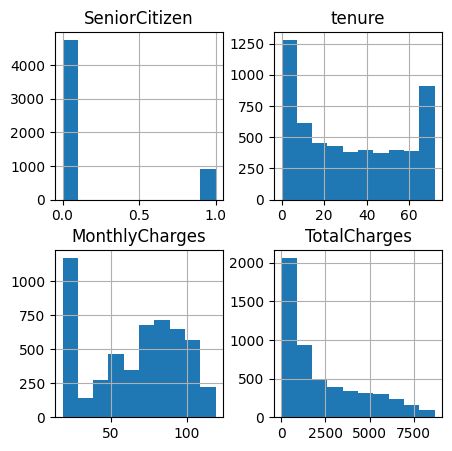

In [211]:
data_train.hist(figsize = (5,5))

#Missing Value treatment for Train data

In [212]:
data_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [213]:
data_train['gender'] = data_train['gender'].fillna(data_train['gender'].mode()[0])

In [214]:
data_train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [215]:
data_train.loc[(data_train['OnlineSecurity'].isna()) & (data_train['InternetService'] == 'No'), 'OnlineSecurity'] = 'No internet service'

In [216]:
data_train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,137


In [217]:
data_train['OnlineSecurity'] = data_train['OnlineSecurity'].fillna(data_train['OnlineSecurity'].mode()[0])

In [218]:
data_train['MonthlyCharges'] = data_train['MonthlyCharges'].fillna(data_train['MonthlyCharges'].median())

In [219]:
data_train['TotalCharges'] = data_train['TotalCharges'].fillna(data_train['MonthlyCharges'].median())

In [220]:
data_train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Outlier treatment for Train data

In [221]:
num_column = data_train.select_dtypes(include = ['float64', 'int64'])

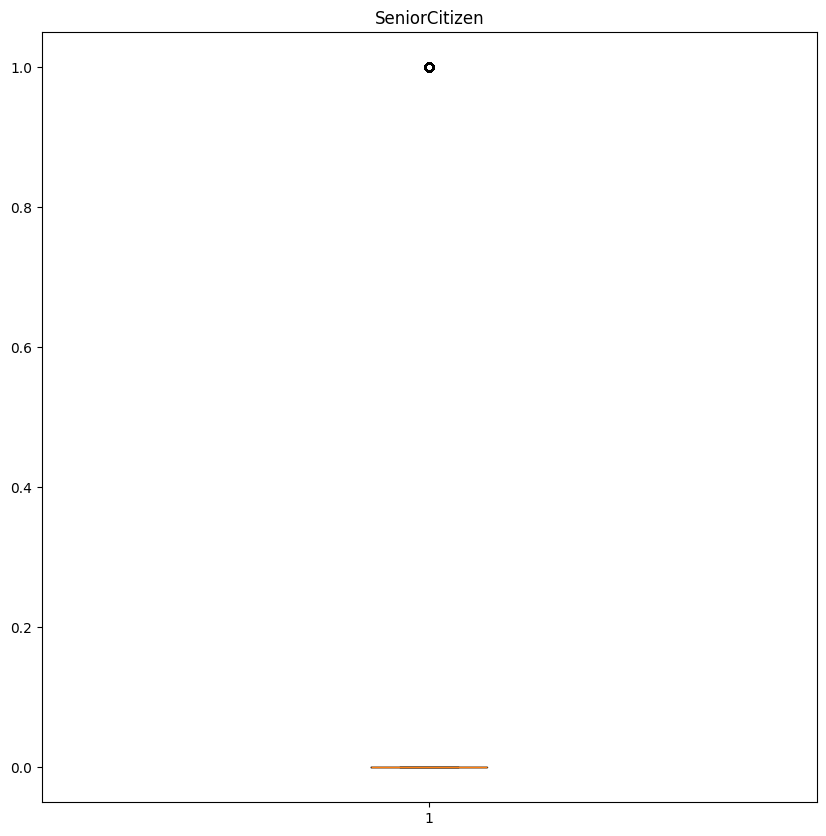

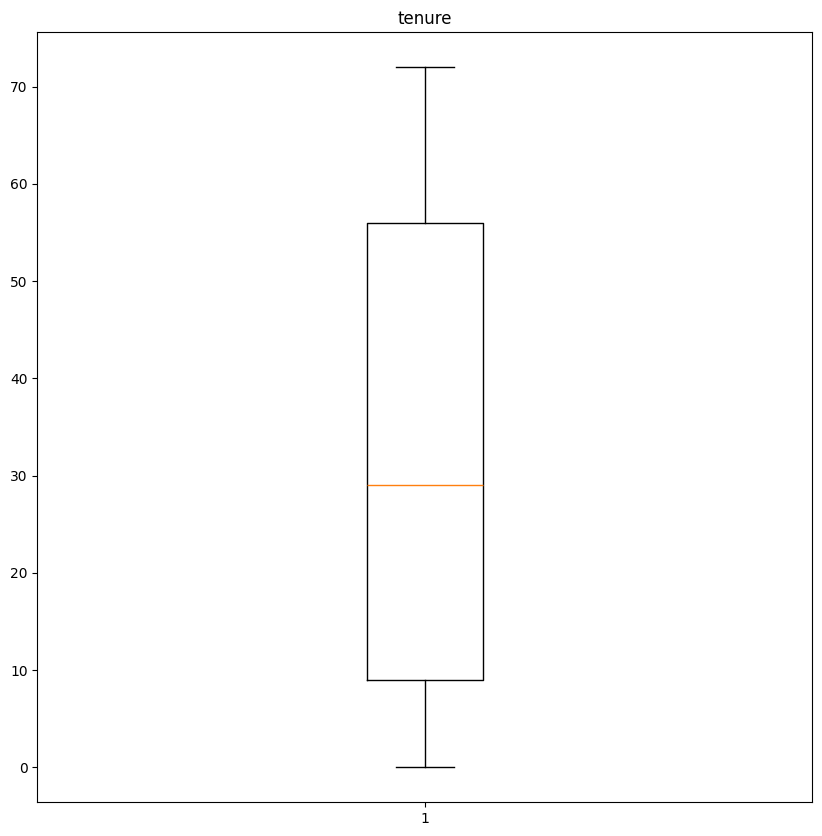

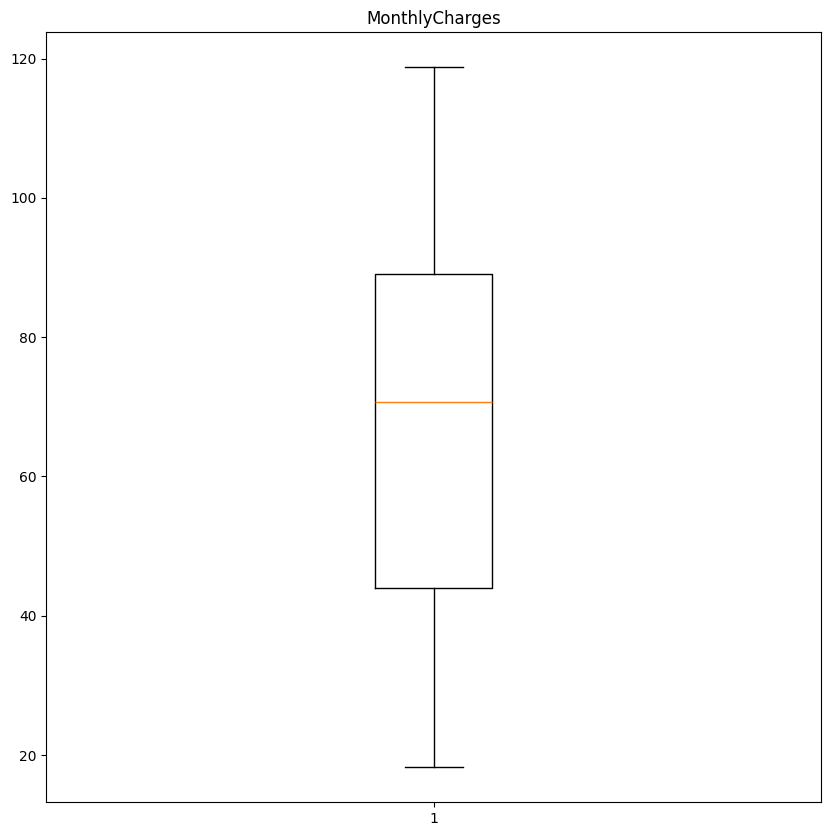

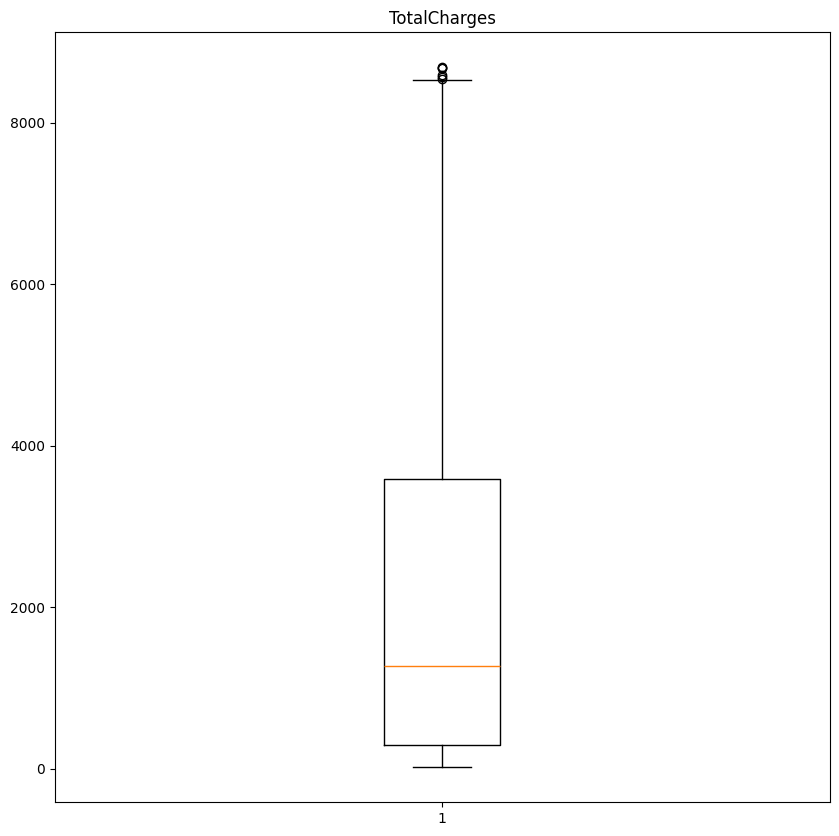

In [222]:
for i in num_column:
  plt.figure(figsize=(10,10))
  plt.boxplot(data_train[i])
  plt.title(i)

In [223]:
#q1 = np.quantile(data_train['TotalCharges'], 0.25)
#q3 = np.quantile(data_train['TotalCharges'], 0.75)
#iqr = q3 - q1
#upper_bound = q3 + (1.5 * iqr)
#lower_bound = q1 - (1.5 * iqr)
#print(upper_bound)
#print(lower_bound)
#print(iqr)

In [224]:
#data_train['TotalCharges'] = data_train['TotalCharges'].clip(lower = lower_bound, upper = upper_bound)

In [225]:
from scipy.stats.mstats import winsorize

In [226]:
data_train['TotalCharges'] = winsorize(data_train['TotalCharges'], limits=[0.01, 0.01]) #When winsorise was used the accuracy increased

#Label Encoding for Train data

In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
data_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [230]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # store encoders for later use (like transforming test data)

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
            'PaperlessBilling', 'Churn']:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    encoders[col] = le

In [231]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(categories= [['Month-to-month', 'One year', 'Two year']])
data_train['Contract'] = ordinal_enc.fit_transform(data_train[['Contract']])

In [232]:
data_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,0,0,0,0,35,1,0,2,1,...,1,1,1,1,1.0,0,3,20.75,6.553150,0
1,7746-AWNQW,0,0,0,0,28,0,1,0,0,...,2,2,0,0,0.0,1,3,35.75,6.869430,0
2,2208-UGTGR,1,0,0,0,56,1,2,1,0,...,0,0,2,2,0.0,0,2,98.60,8.627311,0
3,4884-LEVMQ,1,0,1,0,39,1,0,2,1,...,1,1,1,1,2.0,1,0,20.45,6.673298,0
4,6682-VCIXC,0,0,1,1,43,0,1,0,0,...,0,2,2,0,1.0,1,0,51.25,7.674432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0,0,0,51,1,0,1,0,...,2,0,2,2,0.0,1,2,99.00,8.524993,0
5630,3908-MKIMJ,1,1,1,0,68,0,1,0,2,...,2,0,0,0,2.0,1,2,41.95,7.995222,0
5631,4277-BWBML,1,0,1,1,72,1,0,2,1,...,1,1,1,1,2.0,0,0,19.95,7.188299,0
5632,9110-HSGTV,0,0,0,0,69,1,0,0,0,...,2,2,2,2,2.0,1,1,82.45,8.622688,0


#Scaling for Train data

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>],
       [<Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>],
       [<Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>]], dtype

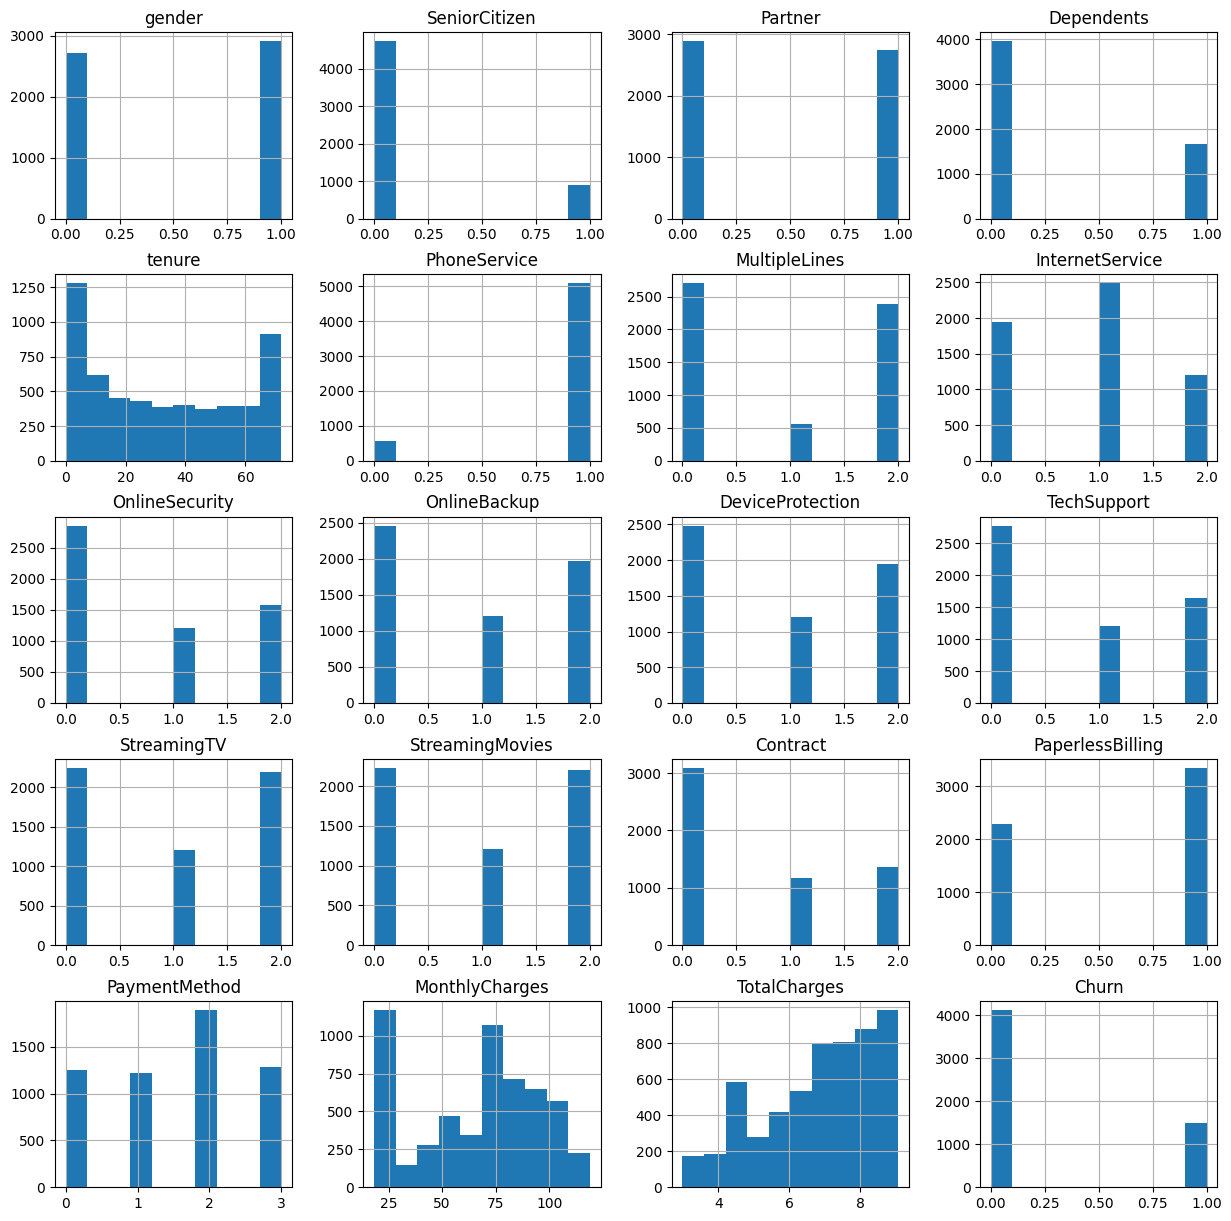

In [233]:
data_train.hist(figsize = (15,15))

In [234]:
from sklearn.preprocessing import StandardScaler
min_scalar = StandardScaler()     #Got more accuracy than MinMaxScaler, when StandardScaler was used for scaling
data_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_scalar.fit_transform(data_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [235]:
data_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,0,0,0,0,0.097232,1,0,2,1,...,1,1,1,1,1.0,0,3,-1.541793,-0.160494,0
1,7746-AWNQW,0,0,0,0,-0.187173,0,1,0,0,...,2,2,0,0,0.0,1,3,-1.024876,0.035834,0
2,2208-UGTGR,1,0,0,0,0.950447,1,2,1,0,...,0,0,2,2,0.0,0,2,1.141008,1.127020,0
3,4884-LEVMQ,1,0,1,0,0.259749,1,0,2,1,...,1,1,1,1,2.0,1,0,-1.552131,-0.085913,0
4,6682-VCIXC,0,0,1,1,0.422266,0,1,0,0,...,0,2,2,0,1.0,1,0,-0.490728,0.535530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0,0,0,0.747300,1,0,1,0,...,2,0,2,2,0.0,1,2,1.154792,1.063506,0
5630,3908-MKIMJ,1,1,1,0,1.437998,0,1,0,2,...,2,0,0,0,2.0,1,2,-0.811217,0.734657,0
5631,4277-BWBML,1,0,1,1,1.600515,1,0,2,1,...,1,1,1,1,2.0,0,0,-1.569362,0.233768,0
5632,9110-HSGTV,0,0,0,0,1.478627,1,0,0,0,...,2,2,2,2,2.0,1,1,0.584460,1.124150,0


#Feature Engineering

In [236]:
data_train['CustomerLifetimeValue'] = data_train['tenure'] * data_train['MonthlyCharges']  #Captures total revenue generated by a customer so far

In [237]:
num_column = data_train.select_dtypes(include = ['float64', 'int64'])

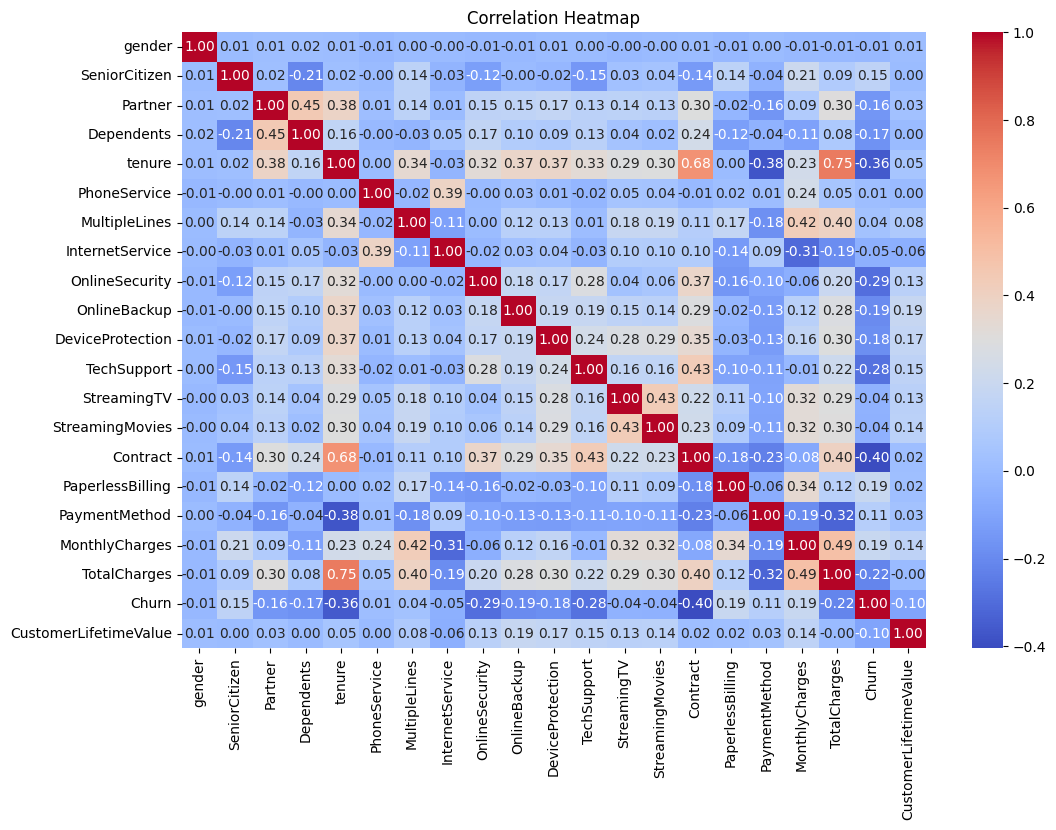

In [238]:
corr = num_column.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#Missing Value Treatment for Test data

In [239]:
data_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [240]:
data_test = data_test.dropna()

In [241]:
num_column = data_test.select_dtypes(include = ['float64', 'int64'])

#Outlier Treatment for Test data

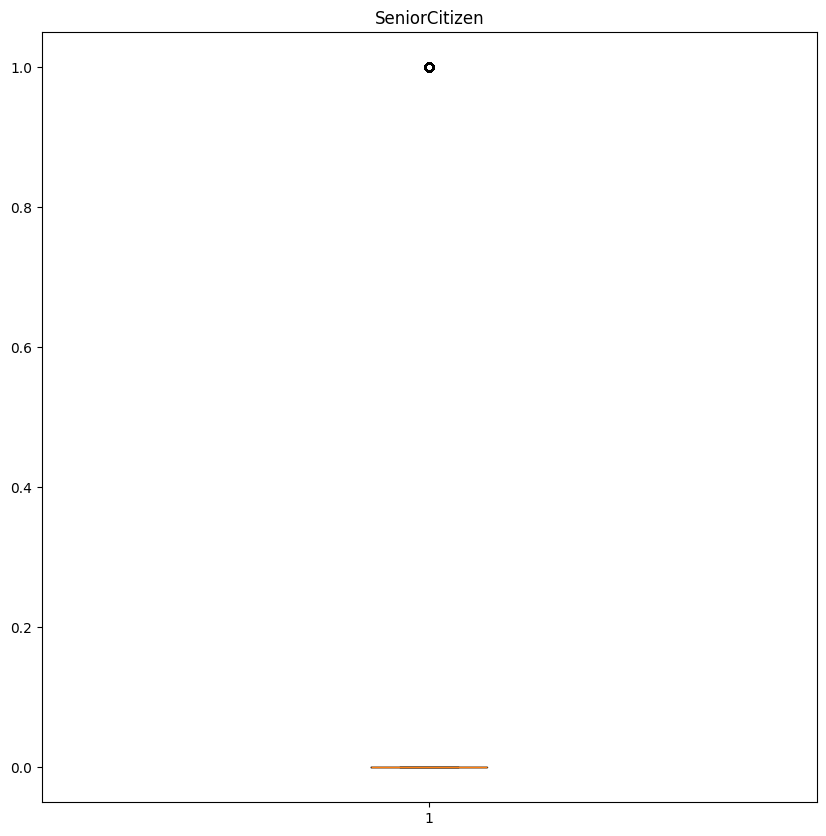

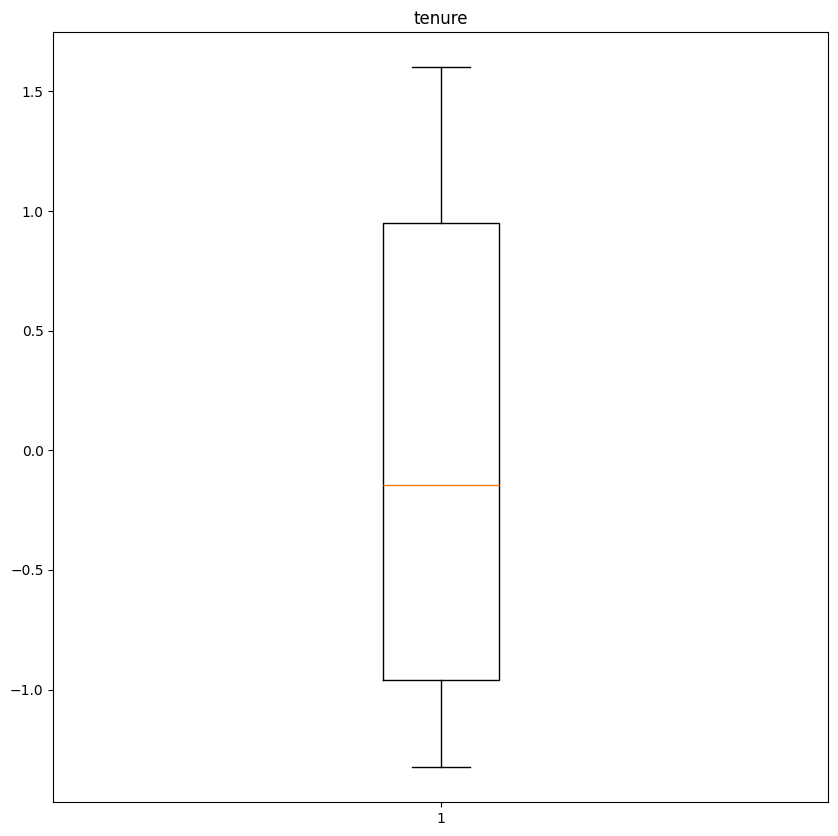

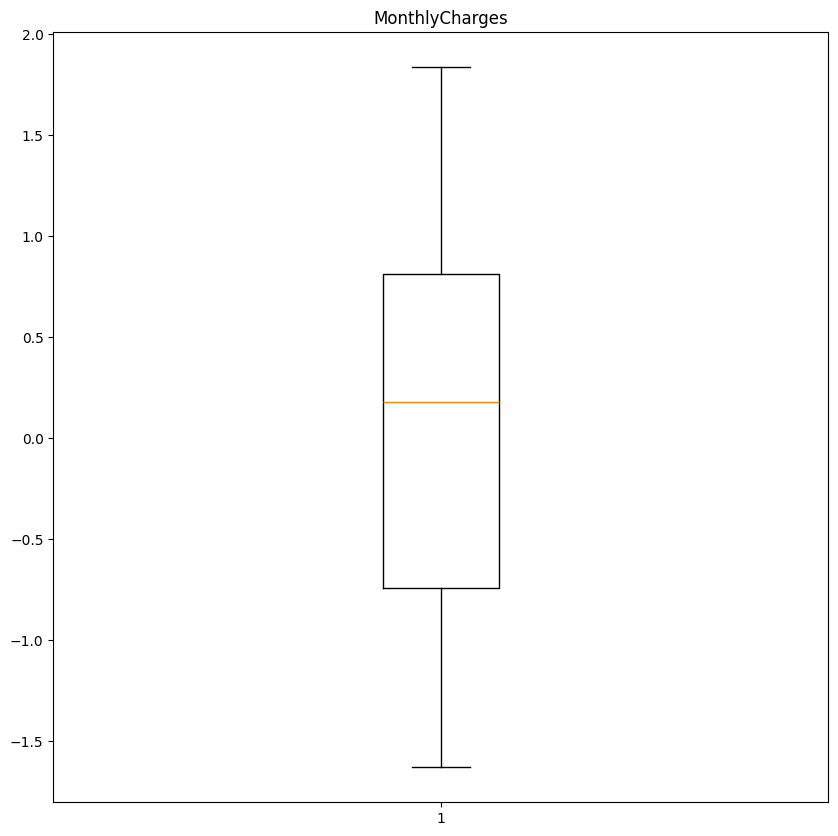

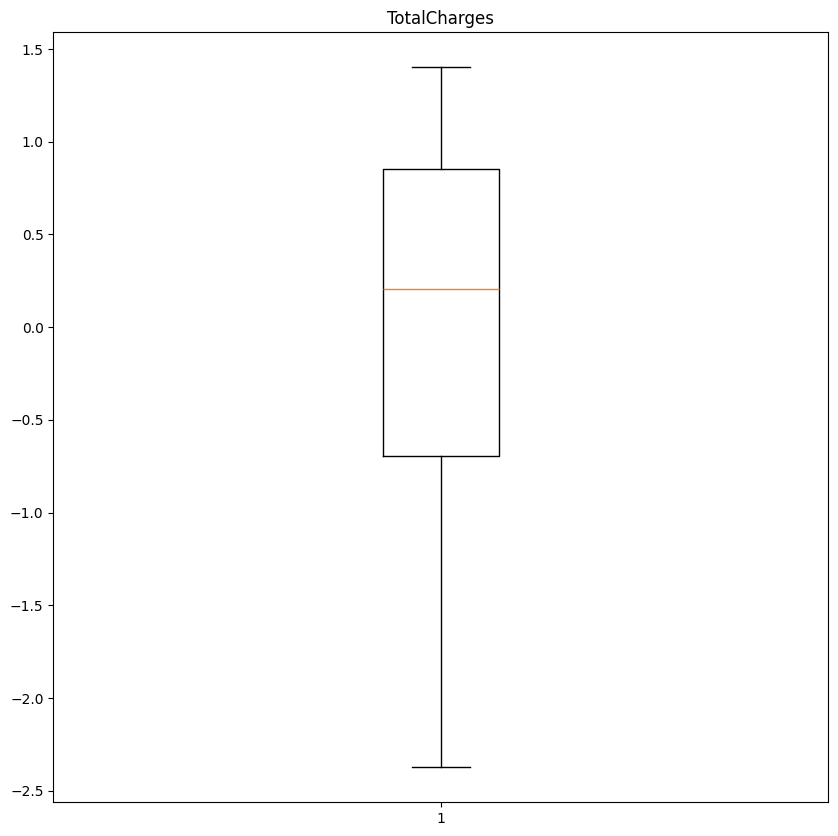

In [242]:
for i in num_column:
  plt.figure(figsize=(10,10))
  plt.boxplot(data_train[i])
  plt.title(i)

#Encoding Test data

In [243]:
for col, le in encoders.items():
    data_test[col] = le.transform(data_test[col])

In [244]:
data_test['Contract'] = ordinal_enc.transform(data_test[['Contract']])

In [245]:
data_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,1,0,1,1,40,1,2,1,0,...,2,0,0,0,0.0,1,2,81.20,3292.30,0
1,7285-KLOTR,0,0,1,0,12,1,2,0,2,...,2,0,2,2,1.0,0,2,78.85,876.75,0
2,7486-KSRVI,1,0,0,0,43,1,2,1,0,...,0,2,2,2,1.0,1,2,100.00,4211.55,1
3,9924-JPRMC,1,0,0,0,72,1,2,1,2,...,2,2,2,2,2.0,1,2,118.20,8547.15,0
4,4439-YRNVD,0,0,0,0,10,0,1,0,0,...,0,2,0,0,0.0,0,2,36.25,374.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,1,0,0,0,27,1,0,0,2,...,0,0,0,0,1.0,0,0,55.45,1477.65,0
1405,2516-VQRRV,0,1,0,0,2,1,2,1,0,...,0,0,0,0,0.0,1,3,75.45,158.40,1
1406,5570-PTWEH,0,0,1,0,3,1,2,1,0,...,0,0,0,0,0.0,1,1,75.15,216.75,1
1407,1722-LDZJS,1,0,1,1,53,1,0,2,1,...,1,1,1,1,1.0,0,1,20.20,1068.15,0


#Test data Scaling

In [246]:
data_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_scalar.transform(data_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

#Feature engineering in test data

In [247]:
data_test['CustomerLifetimeValue'] = data_test['tenure'] * data_test['MonthlyCharges']

In [248]:
data_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'CustomerLifetimeValue'],
      dtype='object')

#Model Development

In [249]:
X_train = data_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'CustomerLifetimeValue']]

In [250]:
y_train = data_train['Churn']

In [251]:
X_test = data_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'CustomerLifetimeValue']]

In [252]:
y_test = data_test['Churn']

In [253]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model = log.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy 0.8095238095238095
Precision 0.6600660066006601
Recall 0.547945205479452
F1 Score 0.5988023952095808


In [255]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Grid search for hyperparameter tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 5, 10, 15],
    'max_features': ['sqrt', 'log2']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2}
Best Score: 0.7809735524451498


In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy 0.7974413646055437
Precision 0.6438848920863309
Recall 0.4904109589041096
F1 Score 0.5567651632970451


In [277]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [278]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred))

Accuracy 0.8130774697938877
Precision 0.6808510638297872
Recall 0.5260273972602739
F1 Score 0.5935085007727975
